# Credit Card Fraud Detection with Logistic Regression


### First install the python plugins

In [ ]:
pip install pandas scikit-learn matplotlib seaborn requests kaggle kagglehub

### Import the libaries

In [ ]:
import os
import json
import shutil
import tkinter as tk
from tkinter import filedialog, simpledialog, messagebox
import zipfile
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import sys
import importlib.util
import subprocess

### The Code

Select an option:
1. Download the files from GitHub (Works for every compiler)
2. Download the files (Local)
3. Select the files (Local)
4. Exit
Option 2: Download the files (Local)
Kaggle credentials found at C:\Users\Ghaith/.kaggle/kaggle.json.
Successfully authenticated with Kaggle API.
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
Downloaded creditcard.csv successfully!
Extracted creditcard.csv successfully!
Starting grid search...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'C': 0.01, 'solver': 'liblinear'}
Best AUC-ROC score: 0.9741964046800794
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.93      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Recall (True Positive Rate): 93%


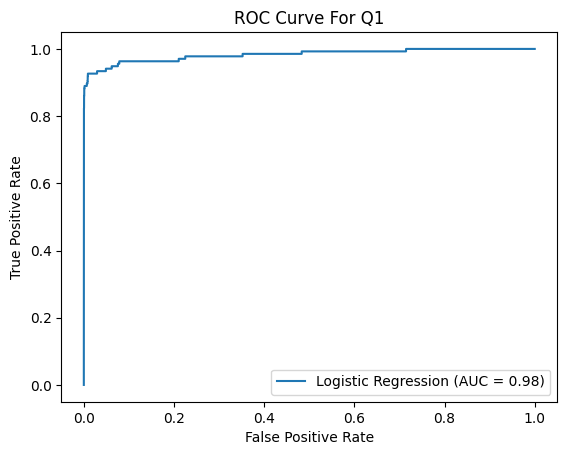

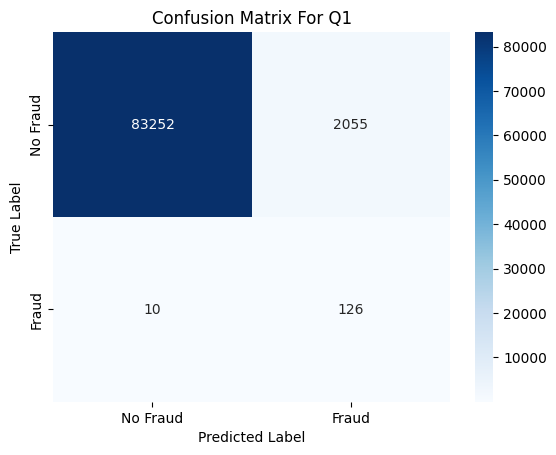

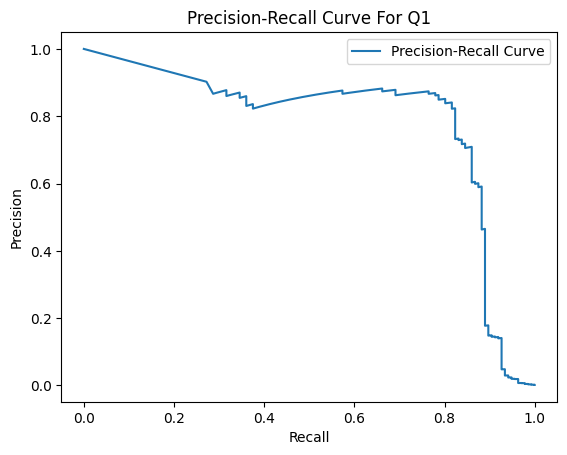

In [18]:
while True:
    # Display options
    print("Select an option:")
    print("1. Download the files from GitHub (Works for every compiler)")
    print("2. Download the files (Local)")
    print("3. Select the files (Local)")
    print("4. Exit")

    # Get user input
    choice = input("Enter your choice (1/2/3/4): ")

    if choice == '1':
        print("Option 1: Download the files from GitHub (Colab)")
        # Add logic for downloading from GitHub here
        url = "https://raw.githubusercontent.com/ghaithmusa0502/UP2089173-Credit-Card-Fraud-Detection/main/py/functions.py"
        #Download the functions.py file from the URL and save it locally
        response = requests.get(url)
        with open("functions.py", "w") as file:
          file.write(response.text)
        # Prompt the user to upload a .py file
        import functions
        functions.download_kaggle_dataset_colab()
        break       
    elif choice == '2':
        print("Option 2: Download the files (Local)")
        url = "https://raw.githubusercontent.com/ghaithmusa0502/UP2089173-Credit-Card-Fraud-Detection/main/py/functions.py"
        #Download the functions.py file from the URL and save it locally
        response = requests.get(url)
        with open("functions.py", "w") as file:
            file.write(response.text)
        root = tk.Tk()
        root.withdraw()
        functions.Download_and_Extract_Kaggle_Dataset_Local()
        break

    elif choice == '3':
        print("Option 3: Select the files (Local)")
        root = tk.Tk()
        root.withdraw()
        filename = filedialog.askopenfilename(title="Select a Python file", filetypes=[("Python Files", "*.py")])
        # Get the directory of the selected file
        file_dir = os.path.dirname(os.path.abspath(filename))
        # Check if the file directory is already in sys.path
        if file_dir not in sys.path:
            sys.path.append(file_dir)
        # Use importlib to load the module dynamically
        module_name = os.path.basename(filename).replace(".py", "")
        spec = importlib.util.spec_from_file_location(module_name, filename)
        functions = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(functions)
        data = functions.upload_csv()
        break

    elif choice == '4':
        print("Exiting program.")
        break

    else:
        print("Invalid choice. Please select a valid option (1/2/3/4).")

# Main script for downloading the dataset and processing
# Step 3: Data Preprocessing
data = pd.read_csv("creditcard.csv")  # Load the dataset
X_scaled, y = functions.preprocess_data(data, target_column='Class')  # Assuming you have this function

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define parameter grid for grid search
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Custom scorer for F1 score
f1_scorer = make_scorer(f1_score, pos_label=1)

# Set up GridSearchCV with 'roc_auc' as the scoring metric
grid_search = GridSearchCV(
    estimator=LogisticRegression(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    scoring={'roc_auc': 'roc_auc', 'f1': f1_scorer},
    refit='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search
print("Starting grid search...")
grid_search.fit(X_train, y_train)

# Display the best model and scores
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best AUC-ROC score:", grid_search.best_score_)

# Additional evaluation of the best model
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create a confusion matrix to show true positives
conf_matrix = confusion_matrix(y_test, y_pred)
true_positive_rate = (conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])) * 100
print(f"Recall (True Positive Rate): {true_positive_rate:.0f}%")

# Step 7: Visualize the Results
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_roc = auc(fpr, tpr)

# Plot the ROC Curve
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_roc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve For Q1')
plt.legend()
plt.show()

# Plot a heatmap of representation of predictions (confusion matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title('Confusion Matrix For Q1')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Compute precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Plot the Precision-Recall Curve
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')  # Label for the X-axis
plt.ylabel('Precision')  # Label for the Y-axis
plt.title('Precision-Recall Curve For Q1')  # Title of the plot
plt.legend()  # Display the legend
plt.show()  # Render the plot

### Explanations behind this code 
A lot of choices behind this code are reliant on the idea of flexibility on how the user would like to load the dataset. Whether the user is using a Google Colab or a local Complier. I purposefully chose in opposition of uploading the dataset into google Colab as I noted that the uploading and the analysis would take up to twenty minutes, whereas downloading the dataset again and performing the analysis would take closer to 2 minutes which is a near 90% increase in speed. I also provided a choice between allowing the user to use their Kaggle API key or opt for the dataset that was available to me at the time (January 2025). This decision was made to prolong the usability of the code, while also making it more accessible to a wider range of users who may not have access to Kaggle.

However while working through this code with the kaggle public api login, providing .json file with an empty username and key also seemed to work and let the user download the dataset without a proper login. However the user will need to run this code again if they were to do it this way. To also get crossfunctionality across a local complier and Google Colab I used a combonation of an if loop and try and exception. This way it can determine the users complier without asking the user what they are using. 

This code utilises a lot of functions from the functions.py file. download_kaggle_dataset_colab(), Download_and_Extract_Kaggle_Dataset_Local(), ensure_kaggle_json_Local(), authenticate_kaggle_Local(), upload_csv() and preprocess_data(). These functions aid in the optimisation and functionality of the code. With from handling the kaggle API Credentials, storing it in the correct locaion, using it to download the correct dataset, to uploading the data and preprocesses the dataset for machine learning into the required format.

For the model choice, I selected Logistic Regression because it's quick, simple, and well-regarded for its efficiency and efficacy in binary classification tasks. In this case, fraudulent transactions are labeled as 1 and non-fraudulent transactions as 0 in the class column of the dataset. Additionally, I used GridSearchCV for hyperparameter tuning to further improve the model's performance by selecting the best parameters based on cross-validation. This helps achieve better predictive accuracy and generalization on unseen data. The grid search allows for efficient parameter tuning using cross-validation, which helps mitigate overfitting by providing an unbiased estimate of the model's performance.

This code evaluates the model's performance by generating a classification report, AUC-ROC score, confusion matrix, and visualizations such as the ROC curve, confusion matrix heatmap, and precision-recall curve. The classification report provides precision, recall, F1-score, and support, which are essential for evaluating models, in imbalanced datasets where accuracy alone may be misleading. The AUC-ROC score, is also a crucial metric for imbalanced datasets, summarises the model's ability to distinguish between classes (fraud vs. non-fraud) with a single value across various thresholds. The confusion matrix highlights the counts of true positives, false positives, true negatives, and false negatives, offering insights into the true positive rate (recall) critical for fraud detection tasks. Visualizations further enhance interpretability, with the ROC curve illustrating the trade-off between true positive and false positive rates at different thresholds, and the AUC providing a concise measure of overall performance. The confusion matrix heatmap, created with Seaborn, offers a more intuitive and visually appealing representation of misclassifications, while the precision-recall curve highlights the balance between precision and recall, making it especially valuable for underrepresented classes like fraudulent transactions.
